MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset=None, appliances=[])
  ElecMeter(instance=2, building=1, dataset=None, appliances=[])
  ElecMeter(instance=3, building=1, dataset=None, appliances=[])
  ElecMeter(instance=4, building=1, dataset=None, appliances=[])
  ElecMeter(instance=5, building=1, dataset=None, appliances=[])
)


/home/adminp/nilmtk/nilmtk/metergroup.py:85: RuntimeWarning: Building 1 has an empty 'appliances' list.
  warnings.warn("Building {} has an empty 'appliances' list."


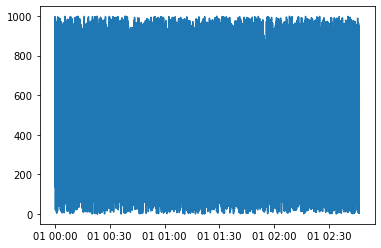

In [72]:
import matplotlib.pyplot as plt
from nilmtk import DataSet
%matplotlib inline

ds = DataSet('random.h5')
elec = ds.buildings[1].elec

#print(ds.metadata)

print(elec)
plt.plot(elec[1].power_series_all_data())



In [35]:
import pandas as pd

pd.read_csv('energy.csv').to_hdf('output_file.hdf5', key='data')

ValueError: The file 'output_file.hdf5' is already opened, but in read-only mode.  Please close it before reopening in append mode.

In [24]:
import pandas as pd
import numpy as np
from nilmtk.datastore import Key
from nilmtk.utils import check_directory_exists, get_datastore, get_module_directory
from nilm_metadata import convert_yaml_to_hdf5

TIMESTAMP_COLUMN_NAME = "timestamp"
TIMEZONE = "Asia/Kolkata"
FREQ = "1T"
LEVEL_NAMES = ['physical_quantity', 'type']

df = pd.read_csv(f'energy2.csv',names =['timestamp','R','A','C','F','V','T'])
column_mapping = {
    'F': ('frequency', ""),
    'V': ('voltage', ""),
    'T': ('power', 'active'),
    'C': ('current', ''),
    'R': ('power', 'reactive'),
    'A': ('power', 'apparent'),
}


output_filename = 'test.h5'

# Open data store
store = get_datastore(output_filename, format='HDF', mode='w')
key = Key(building=1, meter=1)
print('Loading ', 1)
df.index = pd.to_datetime(df.timestamp.values)
df = df.tz_convert(TIMEZONE) #  if error occurs use tz_localize for tz naive timestamps
df = df.drop(TIMESTAMP_COLUMN_NAME, 1)
df.index = pd.to_datetime(df.index.values)
df.columns = pd.MultiIndex.from_tuples(
            [column_mapping[x] for x in df.columns],
            names=LEVEL_NAMES
        )
df = df.apply(pd.to_numeric, errors='ignore')
df = df.dropna()
df = df.astype(np.float32)
df = df.sort_index()
df = df.resample("1T").mean()
assert df.isnull().sum().sum() == 0
store.put(str(key), df)
store.close()
convert_yaml_to_hdf5('./metadata', output_filename)

print("Done converting test data to HDF5!")

ValueError: The file 'test.h5' is already opened.  Please close it before reopening in write mode.